<a href="https://colab.research.google.com/github/phylypo/khmer-text-data/blob/master/text-summ-with-transformer-trax/Transformer_Trax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization with Transfomer
Getting started with abstractive text summarization with Transformer notebook for SVC Datascience meetup [presentation](https://www.meetup.com/scv-data-science/events/275613683/).
See slides [here](https://drive.google.com/file/d/10sJ-Sj5tLzMzP5EA8QH4sPRMiCA3BYxq/view?usp=sharing).


# Use Huggingface
With a few lines of code you can have a state of the art results using a pretrained model from [Huggingface](https://huggingface.co/).

In [ ]:
!pip install transformers
!pip install torch
!pip install sentencepiece

In [ ]:
# formst output text to wrap
from IPython.display import HTML, display
def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### Pipeline with BART
https://huggingface.co/transformers/model_doc/bart.html

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")

In [ ]:
%%time
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, 
sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, 
who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass 
for allegedly sneaking into the New York subway through an emergency exit, said Detective Annette Markowski, a police spokeswoman. 
In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. 
She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

print(summarizer(ARTICLE, max_length=130, min_length=30))

[{'summary_text': ' Liana Barrientos has been married 10 times, nine of them between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say . She is believed to still be married to four men, believed to be four men . She pleaded not guilty at State Supreme Court in the Bronx on Friday .'}]
CPU times: user 9.88 s, sys: 90.7 ms, total: 9.97 s
Wall time: 9.99 s


In [ ]:
ARTICLE = """
The US has "passed the peak" on new coronavirus cases, President Donald Trump said and predicted that 
some states would reopen this month.
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world.
At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors.
"We'll be the comeback kids, all of us," he said. "We want to get our country back."
The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
"""

print(summarizer(ARTICLE, max_length=130, min_length=30)[0]["summary_text"])

 The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world . New guidelines to reopen the country will be announced on Thursday after he speaks to governors .


In [ ]:
ARTICLE = """
Geoffrey Everest Hinton CC FRS FRSC[11] (born 6 December 1947) is a British-Canadian cognitive psychologist and computer scientist, 
most noted for his work on artificial neural networks. Since 2013 he divides his time working for Google (Google Brain) and the University of Toronto. 
In 2017, he cofounded and became the Chief Scientific Advisor of the Vector Institute in Toronto.[12][13]

With David Rumelhart and Ronald J. Williams, Hinton was co-author of a highly cited paper published in 1986 
that popularized the backpropagation algorithm for training multi-layer neural networks,[14] although 
they were not the first to propose the approach.[15] Hinton is viewed as a leading figure in the deep learning community.
The dramatic image-recognition milestone of the AlexNet designed in collaboration with his students Alex Krizhevsky[21] 
and Ilya Sutskever for the ImageNet challenge 2012[22] was a breakthrough in the field of computer vision.[23]

Hinton received the 2018 Turing Award, together with Yoshua Bengio and Yann LeCun, for their work on deep learning.[24] 
They are sometimes referred to as the "Godfathers of AI" and "Godfathers of Deep Learning".
"""
sum = summarizer(ARTICLE, max_length=130, min_length=30)
print(sum[0]['summary_text'])

 Geoffrey Everest Hinton is a British-Canadian cognitive psychologist and computer scientist . He co-authored a paper published in 1986 that popularized the backpropagation algorithm for training multi-layer neural networks . Hinton received the 2018 Turing Award for his work on deep learning .


In [ ]:
print(sum[0]['summary_text'])

 Geoffrey Everest Hinton is a British-Canadian cognitive psychologist and computer scientist . He co-authored a paper published in 1986 that popularized the backpropagation algorithm for training multi-layer neural networks . Hinton received the 2018 Turing Award for his work on deep learning .


In [ ]:
ARTICLE = """
SpaceX CEO Elon Musk has hinted that a simultaneous test of two Mars-bound Starship spacecraft later this month.

Starship prototypes were pictured on a launchpad at SpaceX’s Boca Chica facility in Texas on 1 January. 

When asked on Twitter whether a test would be performed “in the next few weeks”, Mr Musk replied, “yes.”

The flight test would involve the Starship SN9 and SN10 prototypes, which are currently both under development. 

Before either of them fly, they will first need to perform a static fire test to check the triple Raptor engines are functioning correctly.
"""
sum = summarizer(ARTICLE, max_length=130, min_length=30)
print(sum[0]['summary_text'])

 SpaceX CEO Elon Musk hints at simultaneous test of two Mars-bound spacecraft . The SN9 and SN10 prototypes are currently under development . They will need static fire tests to check the triple Raptor engines are functioning correctly .


In [ ]:
ARTICLE = """
Late last month, after years of delays and unfulfilled promises, Cambodia announced 
that it had finally begun extracting crude oil from fields in the Gulf of Thailand.

In 2017, the Cambodian government signed a joint venture with Singapore’s KrisEnergy 
to develop more than 3,000 square kilometers known as Block A, with production initially scheduled to begin in 2019.

On December 29, the day after the first drops of crude trickled from KrisEnergy’s offshore rigs, 
Prime Minister Hun Sen hailed the extraction as “a new achievement for Cambodia’s economy.” 
“The year 2021 is coming… and we have received a huge gift for our nation – the first oil production in our territory,” he wrote in a Facebook post.
"""
sum = summarizer(ARTICLE, max_length=130, min_length=30)
print(sum[0]['summary_text'])


 Cambodia has begun extracting crude oil from fields in the Gulf of Thailand . The country signed a joint venture with Singapore’s KrisEnergy to develop more than 3,000 square kilometers known as Block A . Production initially scheduled to begin in 2019 .


### T5 (Text-To-Text Transfer Transformer)
https://huggingface.co/transformers/model_doc/t5.html

In [ ]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration
import sentencepiece as spm

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

In [ ]:
%%time
text ="""
The US has "passed the peak" on new coronavirus cases, President Donald Trump said and 
predicted that some states would reopen this month.
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world.
At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors.
"We'll be the comeback kids, all of us," he said. "We want to get our country back."
The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
"""

preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

# summmarize 
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=30,
                                    max_length=100,
                                    early_stopping=True)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)

original text preprocessed: 
 The US has "passed the peak" on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month.The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world.At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors."We'll be the comeback kids, all of us," he said. "We want to get our country back."The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that.


Summarized text: 
 the president predicts some states will reopen this month. the u.s. has over 637,000 confirmed cases and over 30,826 deaths, the highest for any country in the world. "we want to get our country back," he says.
CPU times: user 5.38 s, sys: 433 ms,

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")


/usr/local/lib/python3.6/dist-packages/transformers/models/auto/modeling_auto.py:925: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [ ]:
%%time
ARTICLE ="""
The US has "passed the peak" on new coronavirus cases, President Donald Trump said and 
predicted that some states would reopen this month.
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world.
At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors.
"We'll be the comeback kids, all of us," he said. "We want to get our country back."
The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
"""
# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

print(tokenizer.decode(outputs[0]))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. "we'll be the comeback kids, all of us," he says. the president predicts some states will reopen this month.</s>
CPU times: user 7.26 s, sys: 426 ms, total: 7.68 s
Wall time: 7.69 s


In [ ]:
ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)

tokenizer.decode(outputs[0])

'<pad> prosecutors say the marriages were part of an immigration scam. if convicted, barrientos faces two criminal counts of "offering a false instrument for filing in the first degree" she has been married 10 times, nine of them between 1999 and 2002.</s>'

### PEGASUS
https://huggingface.co/transformers/model_doc/pegasus.html

Mutliple inferences can consume more than 12GB of memory. This can cause your runtime session to restart.

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

In [ ]:
src_text = [
    """ PG&E stated it scheduled the blackouts in response to forecasts for high winds amid dry conditions. 
    The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were scheduled to be affected 
    by the shutoffs which were expected to last through at least midday tomorrow."""
]

model_name = 'google/pegasus-xsum'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)
batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest', return_tensors="pt").to(torch_device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
assert tgt_text[0] == "California's largest electricity provider has turned off power to hundreds of thousands of customers."

In [ ]:
tgt_text[0]

"California's largest electricity provider has turned off power to hundreds of thousands of customers."

In [ ]:
%%time
src_text = [""" New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""]

model_name = 'google/pegasus-xsum'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)
batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest', return_tensors="pt").to(torch_device)
translated = model.generate(**batch)
tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
print(tgt_text[0])

A New York woman who has been married 10 times has been charged with marriage fraud.
CPU times: user 29.9 s, sys: 2.25 s, total: 32.1 s
Wall time: 1min 33s


# Transformer from Scratch
In this setion, we dig deeper into transfomre code and training process.

Part of the notebook and Trax code are from Coursera Deeplearning Course: 
Natural-Language-Processing-Specialization.

Course 4: [Natural Language Processing with Attention Models](https://www.coursera.org/learn/sequence-models-in-nlp)

## Setup

In [ ]:
!pip install trax

     |████████████████████████████████| 522kB 16.3MB/s 
     |████████████████████████████████| 3.4MB 63.3MB/s 
     |████████████████████████████████| 215kB 53.7MB/s 
     |████████████████████████████████| 1.2MB 57.8MB/s 
     |████████████████████████████████| 1.8MB 60.9MB/s 
     |████████████████████████████████| 368kB 56.3MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 3.8MB 45.0MB/s 
     |████████████████████████████████| 890kB 52.3MB/s 
     |████████████████████████████████| 2.9MB 46.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=b0f9cf243d190ffa8e6388f1d4c3dac85e64c877c7c93c39415832b06d62ab64
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import sys
import os

import numpy as np

import textwrap
wrapper = textwrap.TextWrapper(width=70)

import trax
from trax import layers as tl
from trax.fastmath import numpy as jnp

# to print the entire np array
np.set_printoptions(threshold=sys.maxsize)

## Helper functions

In [ ]:
def tokenize(input_str, EOS=1):
    """Input str to features dict, ready for inference"""
  
    # Use the trax.data.tokenize method. It takes streams and returns streams,
    # we get around it by making a 1-element stream with `iter`.
    inputs =  next(trax.data.tokenize(iter([input_str]),
                                      vocab_dir='vocab_dir/',
                                      vocab_file='summarize32k.subword.subwords'))
    
    # Mark the end of the sentence with EOS
    return list(inputs) + [EOS]

def detokenize(integers):
    """List of ints to str"""
  
    s = trax.data.detokenize(integers,
                             vocab_dir='vocab_dir/',
                             vocab_file='summarize32k.subword.subwords')
    
    return wrapper.fill(s)

In [ ]:
def create_tensor(t):
    """Create tensor from list of lists"""
    return jnp.array(t)


def display_tensor(t, name):
    """Display shape and tensor"""
    print(f'{name} shape: {t.shape}\n')
    print(f'{t}\n')

## Model

You will be implementing the attention from scratch and then using it in your transformer model. Concretely, you will understand how attention works, how you use it to connect the encoder and the decoder.

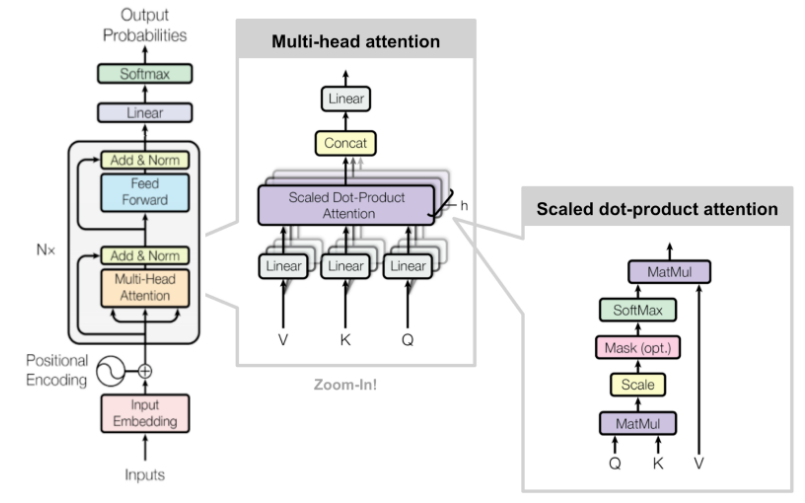

### DotProduct Attention
Instructions: Implement the dot product attention. Concretely, implement the following equation

$ \text { Attention }(Q, K, V)=\operatorname{softmax}\left(\frac{Q K^{T}}{\sqrt{d_{k}}}+{M}\right) V\tag{1}\ $
$Q$ - query, $K$ - key, $V$ - values, $M$ - mask, ${d_k}$ - depth/dimension of the queries and keys (used for scaling down)

In [ ]:
def DotProductAttention(queries, keys, values, mask):
    """Dot product self-attention.
    Args:
        queries (jax.interpreters.xla.DeviceArray): array of query representations with shape (L_q by d)
        keys (jax.interpreters.xla.DeviceArray): array of key representations with shape (L_k by d)
        values (jax.interpreters.xla.DeviceArray): array of value representations with shape (L_k by d) where L_v = L_k
        mask (jax.interpreters.xla.DeviceArray): attention-mask, gates attention with shape (L_q by L_k)

    Returns:
        jax.interpreters.xla.DeviceArray: Self-attention array for q, k, v arrays. (L_q by L_k)
    """

    d_feature = queries.shape[-1]

    # Calculate scaled query key dot product according to formula above
    dots = jnp.matmul(queries, jnp.swapaxes(keys, -1, -2)) / jnp.sqrt(d_feature)

    # Apply the mask
    if mask is not None:
        dots = jnp.where(mask, dots, jnp.full_like(dots, -1e9))
    
    # Softmax formula implementation
    dots = jnp.exp(dots - fastmath.logsumexp(dots, axis=-1, keepdims=True))

    # Multiply dots by values to get self-attention
    out = jnp.matmul(dots, values)
    
    return out

### Causal Attention
Now you are going to implement causal attention: multi-headed attention with a mask to attend only to words that occurred before.
#### Support functions

In [ ]:
def compute_attention_heads_closure(n_heads, d_head):
    """ Function that simulates environment inside CausalAttention function.
    Args:
        d_head (int):  dimensionality of heads.
        n_heads (int): number of attention heads.
    Returns:
        function: compute_attention_heads function
    """

    def compute_attention_heads(x):
        """ Compute the attention heads.
        Args:
            x (jax.interpreters.xla.DeviceArray): tensor with shape (batch_size, seqlen, n_heads X d_head).
        Returns:
            jax.interpreters.xla.DeviceArray: reshaped tensor with shape (batch_size X n_heads, seqlen, d_head).
        """
        
        # Size of the x's batch dimension
        batch_size = x.shape[0]
        seqlen = x.shape[1]
        
        # Reshape
        x = jnp.reshape(x, (batch_size, seqlen, n_heads, d_head))
        x = jnp.transpose(x, (0, 2, 1, 3))
        x = jnp.reshape(x, (-1, seqlen, d_head))
        
        return x
    
    return compute_attention_heads

In [ ]:
def dot_product_self_attention(q, k, v):
    """ Masked dot product self attention.
    Args:
        q (jax.interpreters.xla.DeviceArray): queries.
        k (jax.interpreters.xla.DeviceArray): keys.
        v (jax.interpreters.xla.DeviceArray): values.
    Returns:
        jax.interpreters.xla.DeviceArray: masked dot product self attention tensor.
    """

    # index q.shape using negative values (this is equivalent to counting from right to left)
    mask_size = q.shape[-2]

    # Creates a matrix with ones below the diagonal and 0s above. It should have shape (1, mask_size, mask_size)
    mask = jnp.tril(jnp.ones((1, mask_size, mask_size), dtype=jnp.bool_), k=0)
    
    return DotProductAttention(q, k, v, mask)

In [ ]:
def compute_attention_output_closure(n_heads, d_head):
    """ Function that simulates environment inside CausalAttention function.
    Args:
        d_head (int):  dimensionality of heads.
        n_heads (int): number of attention heads.
    Returns:
        function: compute_attention_output function
    """
    
    def compute_attention_output(x):
        """ Compute the attention output.
        Args:
            x (jax.interpreters.xla.DeviceArray): tensor with shape (batch_size X n_heads, seqlen, d_head).
        Returns:
            jax.interpreters.xla.DeviceArray: reshaped tensor with shape (batch_size, seqlen, n_heads X d_head).
        """

        seqlen = x.shape[1]
        
        # Reshape x using jnp.reshape() to shape (batch_size, n_heads, seqlen, d_head)
        x = jnp.reshape(x, ( -1, n_heads, seqlen, d_head))

        # Transpose x using jnp.transpose() to shape (batch_size, seqlen, n_heads, d_head)
        x = jnp.transpose(x, ( 0, 2, 1 , 3))

        # Reshape to allow to concatenate the heads
        return jnp.reshape(x, (-1, seqlen, n_heads * d_head))
    
    return compute_attention_output

### Language Model
Now it is time for you to put everything together within the CausalAttention or Masked multi-head attention function.

In [ ]:
def CausalAttention(d_feature, 
                    n_heads, 
                    compute_attention_heads_closure=compute_attention_heads_closure,
                    dot_product_self_attention=dot_product_self_attention,
                    compute_attention_output_closure=compute_attention_output_closure,
                    mode='train'):
    """Transformer-style multi-headed causal attention.

    Args:
        d_feature (int):  dimensionality of feature embedding.
        n_heads (int): number of attention heads.
        compute_attention_heads_closure (function): Closure around compute_attention heads.
        dot_product_self_attention (function): dot_product_self_attention function. 
        compute_attention_output_closure (function): Closure around compute_attention_output. 
        mode (str): 'train' or 'eval'.

    Returns:
        trax.layers.combinators.Serial: Multi-headed self-attention model.
    """
    
    assert d_feature % n_heads == 0
    d_head = d_feature // n_heads

    # Since you are dealing with closures you might need to call the outer 
    # function with the correct parameters to get the actual uncalled function.
    ComputeAttentionHeads = tl.Fn('AttnHeads', compute_attention_heads_closure(n_heads, d_head), n_out=1)
    
    
    return tl.Serial(
        tl.Branch( # creates three towers for one input, takes activations and creates queries keys and values
            [tl.Dense(d_feature), ComputeAttentionHeads], # queries
            [tl.Dense(d_feature), ComputeAttentionHeads], # keys
            [tl.Dense(d_feature), ComputeAttentionHeads], # values
        ),
        
        tl.Fn('DotProductAttn', dot_product_self_attention, n_out=1), # takes QKV

        # Since you are dealing with closures you might need to call the outer 
        # function with the correct parameters to get the actual uncalled function.
        tl.Fn('AttnOutput', compute_attention_output_closure(n_heads, d_head), n_out=1), # to allow for parallel
        tl.Dense(d_feature)
    )

In [ ]:
def DecoderBlock(d_model, d_ff, n_heads,
                 dropout, mode, ff_activation):
    """Returns a list of layers that implements a Transformer decoder block.

    The input is an activation tensor.

    Args:
        d_model (int):  depth of embedding.
        d_ff (int): depth of feed-forward layer.
        n_heads (int): number of attention heads.
        dropout (float): dropout rate (how much to drop out).
        mode (str): 'train' or 'eval'.
        ff_activation (function): the non-linearity in feed-forward layer.

    Returns:
        list: list of trax.layers.combinators.Serial that maps an activation tensor to an activation tensor.
    """
    
    # Create masked multi-head attention block using CausalAttention function
    causal_attention = CausalAttention( 
                        d_model,
                        n_heads=n_heads,
                        mode=mode
                        )

    # Create feed-forward block (list) with two dense layers with dropout and input normalized
    feed_forward = [ 
        tl.LayerNorm(),
        tl.Dense(d_ff),
        ff_activation(),
        tl.Dropout(rate=dropout, mode=mode),
        tl.Dense(d_model),
        tl.Dropout(rate=dropout,mode=mode)
    ]

    # Add list of two Residual blocks: the attention with normalization and dropout and feed-forward blocks
    return [
      tl.Residual(
          tl.LayerNorm(),
          causal_attention,
          tl.Dropout(rate=dropout, mode=mode)
        ),
      tl.Residual(
          feed_forward
        ),
      ]

In [ ]:
def TransformerLM(vocab_size=33300,
                  d_model=512,
                  d_ff=2048,
                  n_layers=6,
                  n_heads=8,
                  dropout=0.1,
                  max_len=4096,
                  mode='train',
                  ff_activation=tl.Relu):
    """Returns a Transformer language model.

    The input to the model is a tensor of tokens. (This model uses only the
    decoder part of the overall Transformer.)

    Args:
        vocab_size (int): vocab size.
        d_model (int):  depth of embedding.
        d_ff (int): depth of feed-forward layer.
        n_layers (int): number of decoder layers.
        n_heads (int): number of attention heads.
        dropout (float): dropout rate (how much to drop out).
        max_len (int): maximum symbol length for positional encoding.
        mode (str): 'train', 'eval' or 'predict', predict mode is for fast inference.
        ff_activation (function): the non-linearity in feed-forward layer.

    Returns:
        trax.layers.combinators.Serial: A Transformer language model as a layer that maps from a tensor of tokens
        to activations over a vocab set.
    """

    # Embedding inputs and positional encoder
    positional_encoder = [ 
        tl.Embedding(vocab_size, d_model),
        tl.Dropout(rate=dropout, mode=mode),
        tl.PositionalEncoding(max_len=max_len, mode=mode)]

    # Create stack (list) of decoder blocks with n_layers with necessary parameters
    decoder_blocks = [ 
        DecoderBlock(d_model, d_ff, n_heads,
                    dropout, mode, ff_activation) for _ in range(n_layers)]

    # Create the complete model as written in the figure
    return tl.Serial(
        # Use teacher forcing (feed output of previous step to current step)
        tl.ShiftRight(mode=mode),
        positional_encoder,
        decoder_blocks,
        tl.LayerNorm(),
        tl.Dense(vocab_size),
        tl.LogSoftmax(),
    )

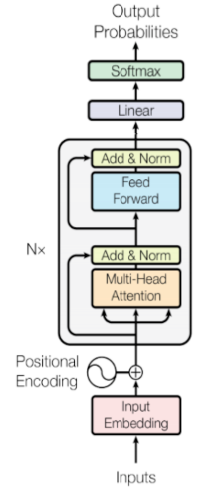

In [ ]:
# Take a look at the Transformer
print(TransformerLM(n_layers=1))

Serial[
  Serial[
    ShiftRight(1)
  ]
  Embedding_33300_512
  Dropout
  PositionalEncoding
  Serial[
    Branch_out2[
      None
      Serial[
        LayerNorm
        Serial[
          Branch_out3[
            [Dense_512, AttnHeads]
            [Dense_512, AttnHeads]
            [Dense_512, AttnHeads]
          ]
          DotProductAttn_in3
          AttnOutput
          Dense_512
        ]
        Dropout
      ]
    ]
    Add_in2
  ]
  Serial[
    Branch_out2[
      None
      Serial[
        LayerNorm
        Dense_2048
        Serial[
          Relu
        ]
        Dropout
        Dense_512
        Dropout
      ]
    ]
    Add_in2
  ]
  LayerNorm
  Dense_33300
  LogSoftmax
]


## Training/Fine Tune
Note that this training does not perform a pretraining as mentioned in the presentation. Normally you do a pretrain the model with large amount of text using tasks such as word masking or next sentence prediction as in BERT. Then you finetune to your specific task like text summarization.

### Load dataset & Preprocessing

In [ ]:
# This will download the dataset if no data_dir is specified.
# Downloading and processing can take bit of time,
# so we have the data already in 'data/' for you

# Importing CNN/DailyMail articles dataset
train_stream_fn = trax.data.TFDS('cnn_dailymail',
                                 data_dir='data/',
                                 keys=('article', 'highlights'),
                                 train=True)

# This should be much faster as the data is downloaded already.
eval_stream_fn = trax.data.TFDS('cnn_dailymail',
                                data_dir='data/',
                                keys=('article', 'highlights'),
                                train=False)

Dataset cnn_dailymail downloaded and prepared to data/cnn_dailymail/3.1.0. Subsequent calls will reuse this data.


### Load vocab
You need the vocab file that can be downloaded grom my gdrive here:
https://drive.google.com/file/d/16dtFmS3L78a8FYbB4rG_7xgCORLZdvW6/view?usp=sharing

In [ ]:
!mkdir vocab_dir
!cp 'drive/MyDrive/m/summarize32k.subword.subwords' vocab_dir/
!ls vocab_dir

summarize32k.subword.subwords


In [ ]:
!wc vocab_dir/summarize32k.subword.subwords

 33021  33376 271723 vocab_dir/summarize32k.subword.subwords


In [ ]:
!head  vocab_dir/summarize32k.subword.subwords
!tail  vocab_dir/summarize32k.subword.subwords

'<pad>'
'<EOS>'
', _'
'. _'
'_'
's_'
'-_'
''_'
' (_'
'The_'
'Ŕ'
'Ň'
'ķ'
'Į'
'ĝ'
'Ď'
'½'
'¼'
'»'
'¹'


In [ ]:
# Special tokens
SEP = 0 # Padding or separator token
EOS = 1 # End of sentence token

# Concatenate tokenized inputs and targets using 0 as separator.
def preprocess(stream):
    for (article, summary) in stream:
        joint = np.array(list(article) + [EOS, SEP] + list(summary) + [EOS])
        mask = [0] * (len(list(article)) + 2) + [1] * (len(list(summary)) + 1) # Accounting for EOS and SEP
        yield joint, joint, np.array(mask)

# You can combine a few data preprocessing steps into a pipeline like this.
input_pipeline = trax.data.Serial(
    # Tokenizes
    trax.data.Tokenize(vocab_dir='vocab_dir/',
                       vocab_file='summarize32k.subword.subwords'),
    # Uses function defined above
    preprocess,
    # Filters out examples longer than 2048
    trax.data.FilterByLength(2048)
)

# Apply preprocessing to data streams.
train_stream = input_pipeline(train_stream_fn())
eval_stream = input_pipeline(eval_stream_fn())

train_input, train_target, train_mask = next(train_stream)

assert sum((train_input - train_target)**2) == 0  # They are the same in Language Model (LM).

In [ ]:
# prints mask, 0s on article, 1s on summary
print(f'Single example mask:\n\n {train_mask}')

Single example mask:

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

In [ ]:
# prints: [Example][<EOS>][<pad>][Example Summary][<EOS>]
print(f'Single example:\n\n {detokenize(train_input)}')

Single example:

 Police in Texas have released a sketch of a man suspected of shooting
a TV weatherman multiple times as he left work on Wednesday morning.
The sketch was drawn  during a hospital bed interview with KCEN-TV
meteorologist Patrick Crawford, 35, who is recovering after being shot
in the stomach and shoulder. The suspect, who managed to escape the
scene in Bruceville-Eddy on foot on Wednesday morning, is described as
a white male, 30 to 35 years old, with a medium build and a receding
hairline. 'We are actively looking for [the suspect],' Trooper D.L.
Wilson of the Texas Department of Public Safety told ABC News. 'We had
troopers out overnight, but we didn't get any calls of suspicious
people. We can't rule out that he's not in the area, but more than
likely, he's left the area.' Scroll down for video . Suspect: KCEN
weatherman Patrick Crawford (left) helped police put together this
sketch (right) of the man who shot him as he left the TV studio on
Wednesday morning. He sa

### Batching Data & Bucketing

In [ ]:
# Bucketing to create batched generators.

# Buckets are defined in terms of boundaries and batch sizes.
# Batch_sizes[i] determines the batch size for items with length < boundaries[i]
# So below, we'll take a batch of 16 sentences of length < 128 , 8 of length < 256,
# 4 of length < 512. And so on. 
boundaries =  [128, 256,  512, 1024]
batch_sizes = [16,    8,    4,    2, 1]

# Create the streams.
train_batch_stream = trax.data.BucketByLength(
    boundaries, batch_sizes)(train_stream)

eval_batch_stream = trax.data.BucketByLength(
    boundaries, batch_sizes)(eval_stream)

In [ ]:
# Every execution will result in generation of a different article
# Try running this cell multiple times to see how the length of the examples affects the batch size
input_batch, _, mask_batch = next(train_batch_stream)

# Shape of the input_batch
print("batch shape", input_batch.shape)
# print corresponding integer values
print(input_batch[0])
# print the article and its summary
print('Article:\n\n', detokenize(input_batch[0]))

batch shape (2, 1024)
[ 6596  4315    23   141  9087   132   213  6705    70   320    28  3680
   527  2659     2   687  5093     5   186   163  5148 10675    16  1838
   699 23960 16328     4 17081    92     3     9  6596   229   132  1828
     2   523  5833    15  2225   141   390  1008  1248    28  1477   132
  4232  8551     2  1019    28   719     6   209  1699     2   186    23
   674  1768    28  1917 24385    14   132   658  7511   103  1041   320
  1536   132   213   606     3 14862 19967   320  4232  8551    18   949
   691   520   318  1641     2   192   213  1216  1019   213  6705    18
   949   691    28  7818 10273  2048   318  1641   719    78   719  1838
   220   104     3  6596  4315    23   141  2362   132   213  6705    70
   186   674  1536 19967  1019   213   606    18 24385    17   379     9
  6596     7     5   635     6   194  3075  1699   803  9233   132 23691
     2  4872 10151    16 17524 26731     2   186  4232  8551   379 19807
   132 23691    23   553    2

### Training Loop

In [ ]:
from trax.supervised import training

def training_loop(TransformerLM, train_gen, eval_gen, output_dir = "model/"):
    '''
    Input:
        TransformerLM (trax.layers.combinators.Serial): The model you are building.
        train_gen (generator): Training stream of data.
        eval_gen (generator): Evaluation stream of data.
        output_dir (str): folder to save your file.
        
    Returns:
        trax.supervised.training.Loop: Training loop.
    '''
    output_dir = os.path.expanduser(output_dir)
    lr_schedule = trax.lr.warmup_and_rsqrt_decay(n_warmup_steps=1000, max_value=0.01)

    train_task = training.TrainTask( 
      labeled_data=train_gen,
      loss_layer=tl.CrossEntropyLoss(),  
      optimizer=trax.optimizers.Adam(0.01),
      lr_schedule=lr_schedule,
      n_steps_per_checkpoint=10
    )

    eval_task = training.EvalTask( 
      labeled_data=eval_gen,
      metrics=[tl.CrossEntropyLoss(), tl.Accuracy()] 
    )

    loop = training.Loop(TransformerLM(d_model=512,
                                       d_ff=2048,
                                       n_layers=6,
                                       n_heads=8,
                                       mode='train'),
                         train_task,
                         eval_tasks=[eval_task],
                         output_dir=output_dir)
    
    return loop

In [ ]:
# Should take around 1.5 minutes
#!rm -f model/model.pkl.gz

loop = training_loop(TransformerLM, train_batch_stream, eval_batch_stream)
loop.run(2) #100 no good about 2mins/10 steps
# seesion crash at:
# Step    230: Ran 10 train steps in 109.17 secs
# Step    230: train CrossEntropyLoss |  7.73998022
# Step    230: eval  CrossEntropyLoss |  7.93894434
# Step    230: eval          Accuracy |  0.03816794

# Step    660: Ran 10 train steps in 135.49 secs
# Step    660: train CrossEntropyLoss |  6.81296635
# Step    660: eval  CrossEntropyLoss |  6.98800230
# Step    660: eval          Accuracy |  0.13533835

# Step   1360: Ran 10 train steps in 122.21 secs
# Step   1360: train CrossEntropyLoss |  6.84790039
# Step   1360: eval  CrossEntropyLoss |  8.03027058
# Step   1360: eval          Accuracy |  0.11068702

# Step   1560: Ran 10 train steps in 119.04 secs
# Step   1560: train CrossEntropyLoss |  7.06054020
# Step   1560: eval  CrossEntropyLoss |  7.39220285
# Step   1560: eval          Accuracy |  0.08474576


Step      1: Total number of trainable weights: 55144980
Step      1: Ran 1 train steps in 43.46 secs
Step      1: train CrossEntropyLoss |  10.41515255
Step      1: eval  CrossEntropyLoss |  10.43891239
Step      1: eval          Accuracy |  0.00000000


In [ ]:
#!cp model/model.pkl.gz 'drive/MyDrive/m/model_1560.pkl.gz'
#!ls -alh drive/MyDrive/m

## Load model

TransformerLM(vocab_size=33300, d_model=512, d_ff=2048, n_layers=6, n_heads=8, 
               dropout=0.1, max_len=4096, ff_activation=tl.Relu)

In [ ]:
# Get the model architecture
model = TransformerLM(mode='eval')

# Load the pre-trained weights -- download from my gdrive here: https://drive.google.com/file/d/15nQKzT2Y2a_xRagIs6rkmGV8b4nFbmuQ/view?usp=sharing
model.init_from_file('drive/MyDrive/m/model.pkl.gz', weights_only=True)

In [ ]:
# copied earlier or download from here: https://drive.google.com/file/d/16dtFmS3L78a8FYbB4rG_7xgCORLZdvW6/view?usp=sharing
!mkdir vocab_dir
!cp 'drive/MyDrive/m/summarize32k.subword.subwords' vocab_dir/
!ls vocab_dir

summarize32k.subword.subwords


In [ ]:
def next_symbol(cur_output_tokens, model, debug=0):
    """Returns the next symbol for a given sentence.

    Args:
        cur_output_tokens (list): tokenized sentence with EOS and PAD tokens at the end.
        model (trax.layers.combinators.Serial): The transformer model.

    Returns:
        int: tokenized symbol.
    """
    
    # current output tokens length
    token_length = len(cur_output_tokens)
    # calculate the minimum power of 2 big enough to store token_length
    padded_length = 2**int(np.ceil(np.log2(token_length + 1)))

    # Fill cur_output_tokens with 0's until it reaches padded_length
    padded = cur_output_tokens + [0] * (padded_length - token_length)
    padded_with_batch = np.array(padded)[None, :]

    # model expects a tuple containing two padded tensors (with batch)
    output, _ = model((padded_with_batch, padded_with_batch))     
    log_probs = output[0, token_length, :]
    
    if debug:
      print("-next_symbol: log_probs shape:", log_probs.shape, " min:", min(log_probs), " max:", max(log_probs))
      print("-next_symbol: argmax:", np.argmax(log_probs), " log_probs[0-9]", log_probs[0:10,])
      print("-next_symbol: detokenize vocab[9]:", detokenize([9]))
    
    return int(np.argmax(log_probs))

In [ ]:
# Test it out!
sentence_test_nxt_symbl = "I want to fly in the sky."
nexttoken = next_symbol(tokenize(sentence_test_nxt_symbl)+[0], model,debug=1)
print("next token:", detokenize([nexttoken]))

-next_symbol: log_probs shape: (33300,)  min: -23.169357  max: -2.1070166
-next_symbol: argmax: 9  log_probs[0-9] [-23.108425  -10.737383   -7.3234496  -6.6196504 -11.768337  -11.942752
  -8.235595   -5.4594674 -11.004757   -2.1070166]
-next_symbol: detokenize vocab[9]: The
next token: The


In [ ]:
def greedy_decode(input_sentence, model):
    """Greedy decode function.

    Args:
        input_sentence (string): a sentence or article.
        model (trax.layers.combinators.Serial): Transformer model.

    Returns:
        string: summary of the input.
    """
    
    # Use tokenize()
    cur_output_tokens = tokenize(input_sentence) + [0]
    print("Input tokens:", cur_output_tokens)
    generated_output = [] 
    cur_output = 0 
    EOS = 1 
    MAXSTEPS=100
    step=0
    
    while cur_output != EOS and step < MAXSTEPS:
        step += 1
        # Get next symbol
        cur_output = next_symbol(cur_output_tokens, model)
        # Append next symbol to original sentence
        cur_output_tokens.append(cur_output)
        # Append next symbol to generated sentence
        generated_output.append(cur_output)
        print(detokenize(generated_output))
        
    return detokenize(generated_output)

## Test Sentences

In [ ]:
# Test it out on a sentence!
test_sentence = """
It was a sunny day when I went to the market to buy some flowers. 
But I only found roses, not tulips."""
print(wrapper.fill(test_sentence), '\n')
print(greedy_decode(test_sentence, model))

 It was a sunny day when I went to the market to buy some flowers.
But I only found roses, not tulips. 

Input tokens: [27439, 6774, 1628, 52, 1353, 28, 24421, 20, 194, 7511, 13, 533, 320, 213, 700, 320, 2444, 87, 5083, 23707, 6774, 1628, 200, 13, 86, 233, 4267, 45, 2, 19, 3735, 18035, 4, 10, 1, 0]
\
\160

 I
 I only
 I only found
 I only found ros
 I only found roses
 I only found roses,
 I only found roses, not
 I only found roses, not tu
 I only found roses, not tulips
 I only found roses, not tulips
 I only found roses, not tulips.
 I only found roses, not tulips.<EOS>
 I only found roses, not tulips.<EOS>


In [ ]:
# Test it out with a whole article!
article = """It’s the posing craze sweeping the U.S. after being brought to fame by skier Lindsey Vonn, 
soccer star Omar Cummings, baseball player Albert Pujols - and even Republican politician Rick Perry. 
But now four students at Riverhead High School on Long Island, New York, have been suspended for dropping 
to a knee and taking up a prayer pose to mimic Denver Broncos quarterback Tim Tebow. 
Jordan Fulcoly, Wayne Drexel, Tyler Carroll and Connor Carroll were all suspended for one day 
because the ‘Tebowing’ craze was blocking the hallway and presenting a safety hazard to students. 
Scroll down for video. Banned: Jordan Fulcoly, Wayne Drexel, Tyler Carroll and Connor Carroll (all pictured left) 
were all suspended for one day by Riverhead High School on Long Island, New York, for their tribute 
to Broncos quarterback Tim Tebow. Issue: Four of the pupils were suspended for one day because 
they allegedly did not heed to warnings that the 'Tebowing' craze at the school was blocking 
the hallway and presenting a safety hazard to students."""
print(wrapper.fill(article), '\n')
print(greedy_decode(article, model))

It’s the posing craze sweeping the U.S. after being brought to fame by
skier Lindsey Vonn,  soccer star Omar Cummings, baseball player Albert
Pujols - and even Republican politician Rick Perry.  But now four
students at Riverhead High School on Long Island, New York, have been
suspended for dropping  to a knee and taking up a prayer pose to mimic
Denver Broncos quarterback Tim Tebow.  Jordan Fulcoly, Wayne Drexel,
Tyler Carroll and Connor Carroll were all suspended for one day
because the ‘Tebowing’ craze was blocking the hallway and presenting a
safety hazard to students.  Scroll down for video. Banned: Jordan
Fulcoly, Wayne Drexel, Tyler Carroll and Connor Carroll (all pictured
left)  were all suspended for one day by Riverhead High School on Long
Island, New York, for their tribute  to Broncos quarterback Tim Tebow.
Issue: Four of the pupils were suspended for one day because  they
allegedly did not heed to warnings that the 'Tebowing' craze at the
school was blocking  the hallway a

In [ ]:
article = """President Donald Trump's administration has introduced executive orders against a range of Chinese firms arguing they could share data with the Chinese government.

China's new export laws are "a reaction to this escalation of the tech war and it's China looking to cover its own advantages", said Alex Capri, visiting professor at the National University of Singapore.
"""
print(wrapper.fill(article), '\n')
print(greedy_decode(article, model))

President Donald Trump's administration has introduced executive
orders against a range of Chinese firms arguing they could share data
with the Chinese government.  China's new export laws are "a reaction
to this escalation of the tech war and it's China looking to cover its
own advantages", said Alex Capri, visiting professor at the National
University of Singapore. 

Input tokens: [699, 4877, 2505, 7, 5, 1945, 23, 1734, 2462, 2979, 214, 28, 598, 527, 1296, 6260, 16509, 41, 143, 1075, 274, 1248, 213, 1296, 266, 4172, 27439, 6774, 7583, 27439, 6774, 1628, 842, 7, 5, 82, 9891, 1544, 1435, 669, 27634, 4, 28, 3212, 320, 824, 16940, 204, 527, 213, 7187, 489, 186, 103, 7, 5, 842, 996, 320, 1284, 50, 221, 10805, 27634, 2, 127, 6131, 4888, 1685, 2, 4956, 3707, 809, 213, 276, 167, 527, 3012, 4172, 27439, 6774, 1628, 1, 0]
Gov
Gov'
Gov's
Gov's Jin
Gov's Jin
Gov's Jin'
Gov's Jin's
Gov's Jin's administration
Gov's Jin's administration has
Gov's Jin's administration has introduced
Gov's Jin's admi

In [ ]:
article = """
A Wisconsin hospital pharmacist was arrested on Thursday (Dec 31) on suspicion of sabotaging more than 500 doses of coronavirus vaccine by deliberately removing them from refrigeration to spoil, police and medical authorities said.

The pharmacist, an employee of Aurora Medical Center in Grafton, Wisconsin, at the time that 57 vials of vaccine were found left out of cold storage earlier this week, has since been fired but has not been publicly identified, officials said.

Each vial contains 10 doses. Nearly 60 of the doses in question were administered before hospital officials determined the medication had been left unrefrigerated long enough to render the vaccine ineffective. The remaining 500-plus doses were then discarded.

Moderna Inc, maker of the vaccine, has assured the hospital that receiving an injection of any of the doses removed from refrigeration poses no safety issue, other than leaving the recipient unprotected from Covid infection, said Dr. Jeff Bahr, Aurora Health Care Medical Group president.
"""
print(wrapper.fill(article), '\n')
print(greedy_decode(article, model))

 A Wisconsin hospital pharmacist was arrested on Thursday (Dec 31) on
suspicion of sabotaging more than 500 doses of coronavirus vaccine by
deliberately removing them from refrigeration to spoil, police and
medical authorities said.  The pharmacist, an employee of Aurora
Medical Center in Grafton, Wisconsin, at the time that 57 vials of
vaccine were found left out of cold storage earlier this week, has
since been fired but has not been publicly identified, officials said.
Each vial contains 10 doses. Nearly 60 of the doses in question were
administered before hospital officials determined the medication had
been left unrefrigerated long enough to render the vaccine
ineffective. The remaining 500-plus doses were then discarded.
Moderna Inc, maker of the vaccine, has assured the hospital that
receiving an injection of any of the doses removed from refrigeration
poses no safety issue, other than leaving the recipient unprotected
from Covid infection, said Dr. Jeff Bahr, Aurora Health Care